TO DO:
1. Scrape the "https://www.last.fm/user/wiretable2/library/tracks" page. 
    This page holds the persons top 45 tracks
    SAVE IN DB:
    track name
    play count
    artist
    track link
    more later....
2. Add the previous information into a database
3. Repeat process for: https://www.last.fm/user/wiretable2/library/albums and https://www.last.fm/user/wiretable2/library/artists
    adding the new information to their own tables
4. Normalize data by creating and linking artist id's with tracks and albums instead of full names.
5. Extend the web scraper to run through the users TOTAL tracks/artists/albums by going through each page
    ex. https://www.last.fm/user/wiretable2/library/artists?page=2
    then add that new data to the database
6. Using each songs individual page on last.fm (ex. https://www.last.fm/music/Joy+Division/_/Disorder) find the spotify link for 
    each song (these are under "Play this track" on the tracks page) and record its track data using spotify API

In [87]:
from requests import get
from bs4 import BeautifulSoup
import re


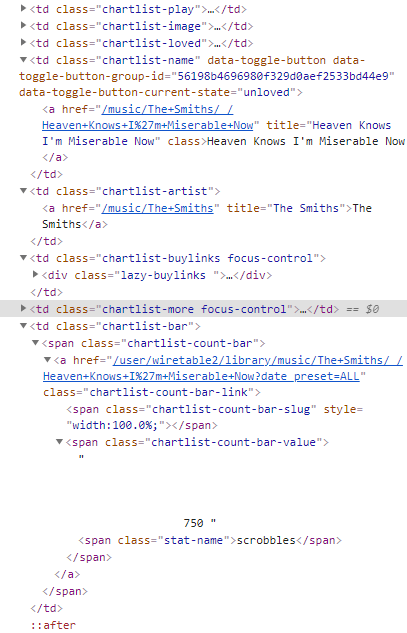

In [160]:
#creating loop to create urls for each page

#initializing iterator variable
z = 1

#creating empty list for urls to be stored in
urls = []

#while the number of pages lower than 51
#note: if a user does not have 50 pages of songs, last.fm just goes to their last page (92 for me)
while z < 5:
    
    #generating url using format to insert the incrementing variable on each loop
    url = 'https://www.last.fm/user/wiretable2/library/tracks?page={}'.format(z)

    
    #appending the url to the list of urls
    urls.append(url)
    
    #incrementing iterator variable so it can go to the next page
    z += 1

In [161]:
#creating empty soup item to store the generated html files in
html_soups = BeautifulSoup()

for url in urls:
    
    #creating response to use in BeautifulSoup function
    response = get(url)
    
    #using the BeautifulSoup function on each response, appending the resulting soup object into the empty 'html_soups'
    html_soups.append(BeautifulSoup(response.text, 'html.parser'))

In [163]:

tracks=[]
names=[]
link=[]
artist=[]
count=[]
for _ in html_soups.find_all("td", class_="chartlist-name"):
    names.append(_.a['title'])
    link.append(_.a['href'])
for _ in html_soups.find_all("td", class_="chartlist-artist"):
    artist.append(_.text.strip())
for _ in html_soups.find_all("span", class_="chartlist-count-bar-value"):
    count.append(int(re.search(r'\d+',_.text.strip()).group()))
i=0
while i < len(names):
    tracks.append({'song_id':i, 'info':[{'title':names[i], 'plays':count[i],'lfm_link':link[i], 'artist':artist[i]}]})
    i+=1
tracks[:5]

[{'song_id': 0,
  'info': [{'title': "Heaven Knows I'm Miserable Now",
    'plays': 751,
    'lfm_link': '/music/The+Smiths/_/Heaven+Knows+I%27m+Miserable+Now',
    'artist': 'The Smiths'}]},
 {'song_id': 1,
  'info': [{'title': 'Doomsday (feat. Pebbles The Invisible Girl)',
    'plays': 514,
    'lfm_link': '/music/MF+DOOM/_/Doomsday+(feat.+Pebbles+The+Invisible+Girl)',
    'artist': 'MF DOOM'}]},
 {'song_id': 2,
  'info': [{'title': 'There Is a Light That Never Goes Out',
    'plays': 514,
    'lfm_link': '/music/The+Smiths/_/There+Is+a+Light+That+Never+Goes+Out',
    'artist': 'The Smiths'}]},
 {'song_id': 3,
  'info': [{'title': 'This Charming Man',
    'plays': 436,
    'lfm_link': '/music/The+Smiths/_/This+Charming+Man',
    'artist': 'The Smiths'}]},
 {'song_id': 4,
  'info': [{'title': 'Disorder',
    'plays': 428,
    'lfm_link': '/music/Joy+Division/_/Disorder',
    'artist': 'Joy Division'}]}]

In [ ]:
#TIME TO DO ARTIST SCROBBLE COUNTS
